<a href="https://colab.research.google.com/github/Techbasu/master_solidity/blob/master/RealEstatePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the Libraries

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Reading the dataset

In [12]:
df= pd.read_csv('Real_estate.csv')
X= df.iloc[:, 1:7].values ## independant
Y= df.iloc[:, -1].values ## dependant

In [13]:
print(df.describe())

               No  X1 transaction date  X2 house age  \
count  414.000000           414.000000    414.000000   
mean   207.500000          2013.148971     17.712560   
std    119.655756             0.281967     11.392485   
min      1.000000          2012.667000      0.000000   
25%    104.250000          2012.917000      9.025000   
50%    207.500000          2013.167000     16.100000   
75%    310.750000          2013.417000     28.150000   
max    414.000000          2013.583000     43.800000   

       X3 distance to the nearest MRT station  \
count                              414.000000   
mean                              1083.885689   
std                               1262.109595   
min                                 23.382840   
25%                                289.324800   
50%                                492.231300   
75%                               1454.279000   
max                               6488.021000   

       X4 number of convenience stores  X5 latitude  

In [14]:
print(df.head(10))

   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   
5   6             2012.667           7.1   
6   7             2012.667          34.5   
7   8             2013.417          20.3   
8   9             2013.500          31.7   
9  10             2013.417          17.9   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   
5                              2175.03000      

In [15]:
print(X)

[[2012.917     32.        84.87882   10.        24.98298  121.54024]
 [2012.917     19.5      306.5947     9.        24.98034  121.53951]
 [2013.583     13.3      561.9845     5.        24.98746  121.54391]
 ...
 [2013.25      18.8      390.9696     7.        24.97923  121.53986]
 [2013.         8.1      104.8101     5.        24.96674  121.54067]
 [2013.5        6.5       90.45606    9.        24.97433  121.5431 ]]


In [16]:
print(Y)

[ 37.9  42.2  47.3  54.8  43.1  32.1  40.3  46.7  18.8  22.1  41.4  58.1
  39.3  23.8  34.3  50.5  70.1  37.4  42.3  47.7  29.3  51.6  24.6  47.9
  38.8  27.   56.2  33.6  47.   57.1  22.1  25.   34.2  49.3  55.1  27.3
  22.9  25.3  47.7  46.2  15.9  18.2  34.7  34.1  53.9  38.3  42.   61.5
  13.4  13.2  44.2  20.7  27.   38.9  51.7  13.7  41.9  53.5  22.6  42.4
  21.3  63.2  27.7  55.   25.3  44.3  50.7  56.8  36.2  42.   59.   40.8
  36.3  20.   54.4  29.5  36.8  25.6  29.8  26.5  40.3  36.8  48.1  17.7
  43.7  50.8  27.   18.3  48.   25.3  45.4  43.2  21.8  16.1  41.   51.8
  59.5  34.6  51.   62.2  38.2  32.9  54.4  45.7  30.5  71.   47.1  26.6
  34.1  28.4  51.6  39.4  23.1   7.6  53.3  46.4  12.2  13.   30.6  59.6
  31.3  48.   32.5  45.5  57.4  48.6  62.9  55.   60.7  41.   37.5  30.7
  37.5  39.5  42.2  20.8  46.8  47.4  43.5  42.5  51.4  28.9  37.5  40.1
  28.4  45.5  52.2  43.2  45.1  39.7  48.5  44.7  28.9  40.9  20.7  15.6
  18.3  35.6  39.4  37.4  57.8  39.6  11.6  55.5  5

## Treating Missing values

In [17]:
from sklearn.impute import SimpleImputer as SI
missing= SI(missing_values=np.nan, strategy='mean')
X= missing.fit_transform(X)

## Splitting the dataset

In [18]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test= tts(X,Y,test_size=0.25,random_state=0)

In [19]:
print(x_train)

[[2.0130000e+03 1.2900000e+01 1.8748230e+02 1.0000000e+00 2.4973880e+01
  1.2152981e+02]
 [2.0127500e+03 1.1500000e+01 1.3601390e+03 1.0000000e+00 2.4952040e+01
  1.2154842e+02]
 [2.0134170e+03 3.3600000e+01 3.7124950e+02 8.0000000e+00 2.4972540e+01
  1.2154059e+02]
 ...
 [2.0130000e+03 1.3600000e+01 4.1973490e+03 0.0000000e+00 2.4938850e+01
  1.2150383e+02]
 [2.0135830e+03 3.5900000e+01 6.4073910e+02 3.0000000e+00 2.4975630e+01
  1.2153715e+02]
 [2.0135830e+03 6.6000000e+00 9.0456060e+01 9.0000000e+00 2.4974330e+01
  1.2154310e+02]]


In [20]:
print(x_test)

[[2.0128330e+03 1.0300000e+01 2.1144730e+02 1.0000000e+00 2.4974170e+01
  1.2152999e+02]
 [2.0133330e+03 2.4000000e+01 4.5276870e+03 0.0000000e+00 2.4947410e+01
  1.2149628e+02]
 [2.0133330e+03 3.4500000e+01 3.2494190e+02 6.0000000e+00 2.4978140e+01
  1.2154170e+02]
 [2.0133330e+03 2.5600000e+01 4.5196900e+03 0.0000000e+00 2.4948260e+01
  1.2149587e+02]
 [2.0135000e+03 1.4400000e+01 1.6998030e+02 1.0000000e+00 2.4973690e+01
  1.2152979e+02]
 [2.0130830e+03 3.6600000e+01 4.8881930e+02 8.0000000e+00 2.4970150e+01
  1.2154494e+02]
 [2.0132500e+03 3.5800000e+01 1.7073110e+02 7.0000000e+00 2.4967190e+01
  1.2154269e+02]
 [2.0130830e+03 3.4800000e+01 4.0521340e+02 1.0000000e+00 2.4973490e+01
  1.2153372e+02]
 [2.0134170e+03 1.0500000e+01 2.7917260e+02 7.0000000e+00 2.4975280e+01
  1.2154541e+02]
 [2.0134170e+03 1.7200000e+01 3.9056840e+02 5.0000000e+00 2.4979370e+01
  1.2154245e+02]
 [2.0132500e+03 1.3300000e+01 2.5063100e+02 7.0000000e+00 2.4966060e+01
  1.2154297e+02]
 [2.0130830e+03 1.330

In [21]:
print(y_train)

[ 33.1  26.2  41.9  18.8  78.   15.6  39.4  41.   23.5  35.6  47.1  35.6
  55.   41.5  37.4  21.8  31.3  36.8  26.6  40.   50.   38.1  59.5  56.8
  25.3  32.4  37.8  49.8  52.7  21.8  28.8  29.3  37.4  37.4  44.   50.7
  42.3  36.5  51.4  32.9  38.6  21.4  50.4  37.4  52.2  58.8  43.8  22.1
  53.3  17.4  45.7  36.6  39.7  15.4  12.2  46.6  31.3  22.3  23.1  17.4
  46.8  32.9  62.9  25.5  42.2  42.5  39.5  49.3  31.3  11.6  55.1  19.
  34.6  50.8  63.2  43.4  35.1  27.3  41.2  37.2  23.1  14.7  34.1  37.5
  42.   25.6  53.3  41.4  20.   47.4  24.7  38.5  49.   57.1  55.9  36.9
  25.6  20.7  37.   29.5  33.6  47.3  23.9  18.3  35.7  67.7  40.6  43.5
  31.1  51.8  61.9  56.3  63.3  48.1  18.6  20.5  20.9  27.3  26.6  34.
  52.2  56.8  38.8  44.   39.7  53.9  30.6  42.3  41.   16.1  39.4  73.6
  44.5  36.7  30.5  15.9  42.3  34.1  26.5  24.4  31.7  40.8  23.8  28.6
  58.   37.3  42.9  28.1  46.6  57.8  30.5  39.6  17.7  40.6  27.3  51.6
  39.7  28.9  70.1  45.4  28.4  11.2  42.5  39.   30.

In [22]:
print(y_test)

[45.3 14.4 46.  15.6 50.2 38.1 48.5 41.4 51.6 40.1 42.  42.4 28.5 39.1
 53.7 36.8 40.6 55.2 39.3 44.3 53.5 25.3 22.8 51.7 45.5 34.4 31.6 25.9
 49.5 24.7 51.7 29.7 45.4 50.5 26.5 30.1 46.1 28.9 54.4 15.  44.9 29.8
 23.6 48.  16.7 40.9 40.2 12.9 21.3 62.1 63.9 40.3 42.2 19.1 28.4 28.5
 60.7 37.5 39.3 28.8 42.3 44.3 42.6 57.4 42.2 25.7 13.2 27.  56.2 38.3
 20.8 43.1 78.3 20.9 32.5 33.4 32.1 19.2 53.  38.2 46.7 24.6 36.2 23.2
 29.3 38.4 37.5 34.3 44.8 54.4 37.9  7.6 29.5 25.3 13.7 30.  30.8 40.6
 20.7 40.8 55.3 40.5 40.8 40.3]


## Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler as SSC
sc= SSC()
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)

In [24]:
print(x_train)

[[-0.54206935 -0.40538356 -0.72684272 -1.05131312  0.37783665 -0.20876104]
 [-1.43264797 -0.52936105  0.19272947 -1.05131312 -1.33266413  1.00153273]
 [ 0.94341579  1.42771227 -0.58273643  1.35517366  0.27288834  0.49231187]
 ...
 [-0.54206935 -0.34339481  2.41760858 -1.39509694 -2.36570009 -1.89835977]
 [ 1.53476     1.63138958 -0.37140847 -0.36374547  0.514896    0.26859287]
 [ 1.53476    -0.96328229 -0.80292861  1.69895749  0.41308048  0.6555487 ]]


In [25]:
print(x_test)

[[-1.13697587e+00 -6.35627477e-01 -7.08049878e-01 -1.05131312e+00
   4.00549340e-01 -1.97054817e-01]
 [ 6.44181373e-01  5.77580871e-01  2.67665254e+00 -1.39509694e+00
  -1.69528403e+00 -2.38937095e+00]
 [ 6.44181373e-01  1.50741209e+00 -6.19049852e-01  6.67606010e-01
   7.11478282e-01  5.64500268e-01]
 [ 6.44181373e-01  7.19269437e-01  2.67038146e+00 -1.39509694e+00
  -1.62871234e+00 -2.41603513e+00]
 [ 1.23908789e+00 -2.72550526e-01 -7.40567409e-01 -1.05131312e+00
   3.62955916e-01 -2.10061736e-01]
 [-2.46397249e-01  1.69337833e+00 -4.90540717e-01  1.35517366e+00
   8.57044162e-02  7.75212349e-01]
 [ 3.48509271e-01  1.62253405e+00 -7.39978647e-01  1.01138984e+00
  -1.46121697e-01  6.28884515e-01]
 [-2.46397249e-01  1.53397869e+00 -5.56102667e-01 -1.05131312e+00
   3.47291990e-01  4.55242151e-02]
 [ 9.43415791e-01 -6.17916406e-01 -6.54941154e-01  1.01138984e+00
   4.87484132e-01  8.05778608e-01]
 [ 9.43415791e-01 -2.45955354e-02 -5.67586961e-01  3.23822184e-01
   8.07811430e-01  6.1327

## APPLY MULTIPLE LINEAR REGRESSION

In [28]:
from sklearn.linear_model import LinearRegression as LR
clg= LR().fit(x_train,y_train)

## Predicting New Results

In [34]:
print(clg.predict(sc.transform([[2013.304,10.45,100.430,4,24.6543,121.43234]])))

[-22.34785582]


## Predicting the Test set Results

In [40]:
y_pred=clg.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[39.78 45.3 ]
 [13.17 14.4 ]
 [42.6  46.  ]
 [12.98 15.6 ]
 [42.74 50.2 ]
 [40.45 38.1 ]
 [41.26 48.5 ]
 [33.93 41.4 ]
 [50.03 51.6 ]
 [46.39 40.1 ]
 [46.47 42.  ]
 [41.01 42.4 ]
 [39.2  28.5 ]
 [40.6  39.1 ]
 [47.17 53.7 ]
 [38.77 36.8 ]
 [40.7  40.6 ]
 [40.74 55.2 ]
 [41.01 39.3 ]
 [42.74 44.3 ]
 [49.78 53.5 ]
 [31.48 25.3 ]
 [39.67 22.8 ]
 [45.72 51.7 ]
 [46.26 45.5 ]
 [43.76 34.4 ]
 [47.18 31.6 ]
 [25.96 25.9 ]
 [48.44 49.5 ]
 [21.75 24.7 ]
 [45.56 51.7 ]
 [35.46 29.7 ]
 [42.29 45.4 ]
 [38.95 50.5 ]
 [44.36 26.5 ]
 [32.91 30.1 ]
 [48.25 46.1 ]
 [39.96 28.9 ]
 [52.8  54.4 ]
 [ 7.2  15.  ]
 [53.33 44.9 ]
 [33.11 29.8 ]
 [34.05 23.6 ]
 [50.51 48.  ]
 [15.78 16.7 ]
 [43.96 40.9 ]
 [42.52 40.2 ]
 [12.86 12.9 ]
 [34.32 21.3 ]
 [49.32 62.1 ]
 [54.49 63.9 ]
 [38.75 40.3 ]
 [48.03 42.2 ]
 [25.82 19.1 ]
 [31.01 28.4 ]
 [34.43 28.5 ]
 [49.21 60.7 ]
 [40.99 37.5 ]
 [43.62 39.3 ]
 [33.1  28.8 ]
 [44.67 42.3 ]
 [44.46 44.3 ]
 [39.45 42.6 ]
 [47.24 57.4 ]
 [36.96 42.2 ]
 [30.22 25.7 ]
 [ 9.47 13

## Evaluating Model Performance

In [37]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.582715258647732

## Coefficient Intercept

In [38]:
print(clg.coef_)
print(clg.intercept_)

[ 1.66 -2.91 -5.64  3.35  2.74  0.01]
38.24032258064987


## Histogram for numerical features

array([[<Axes: title={'center': 'No'}>,
        <Axes: title={'center': 'X1 transaction date'}>,
        <Axes: title={'center': 'X2 house age'}>],
       [<Axes: title={'center': 'X3 distance to the nearest MRT station'}>,
        <Axes: title={'center': 'X4 number of convenience stores'}>,
        <Axes: title={'center': 'X5 latitude'}>],
       [<Axes: title={'center': 'X6 longitude'}>,
        <Axes: title={'center': 'Y house price of unit area'}>, <Axes: >]],
      dtype=object)

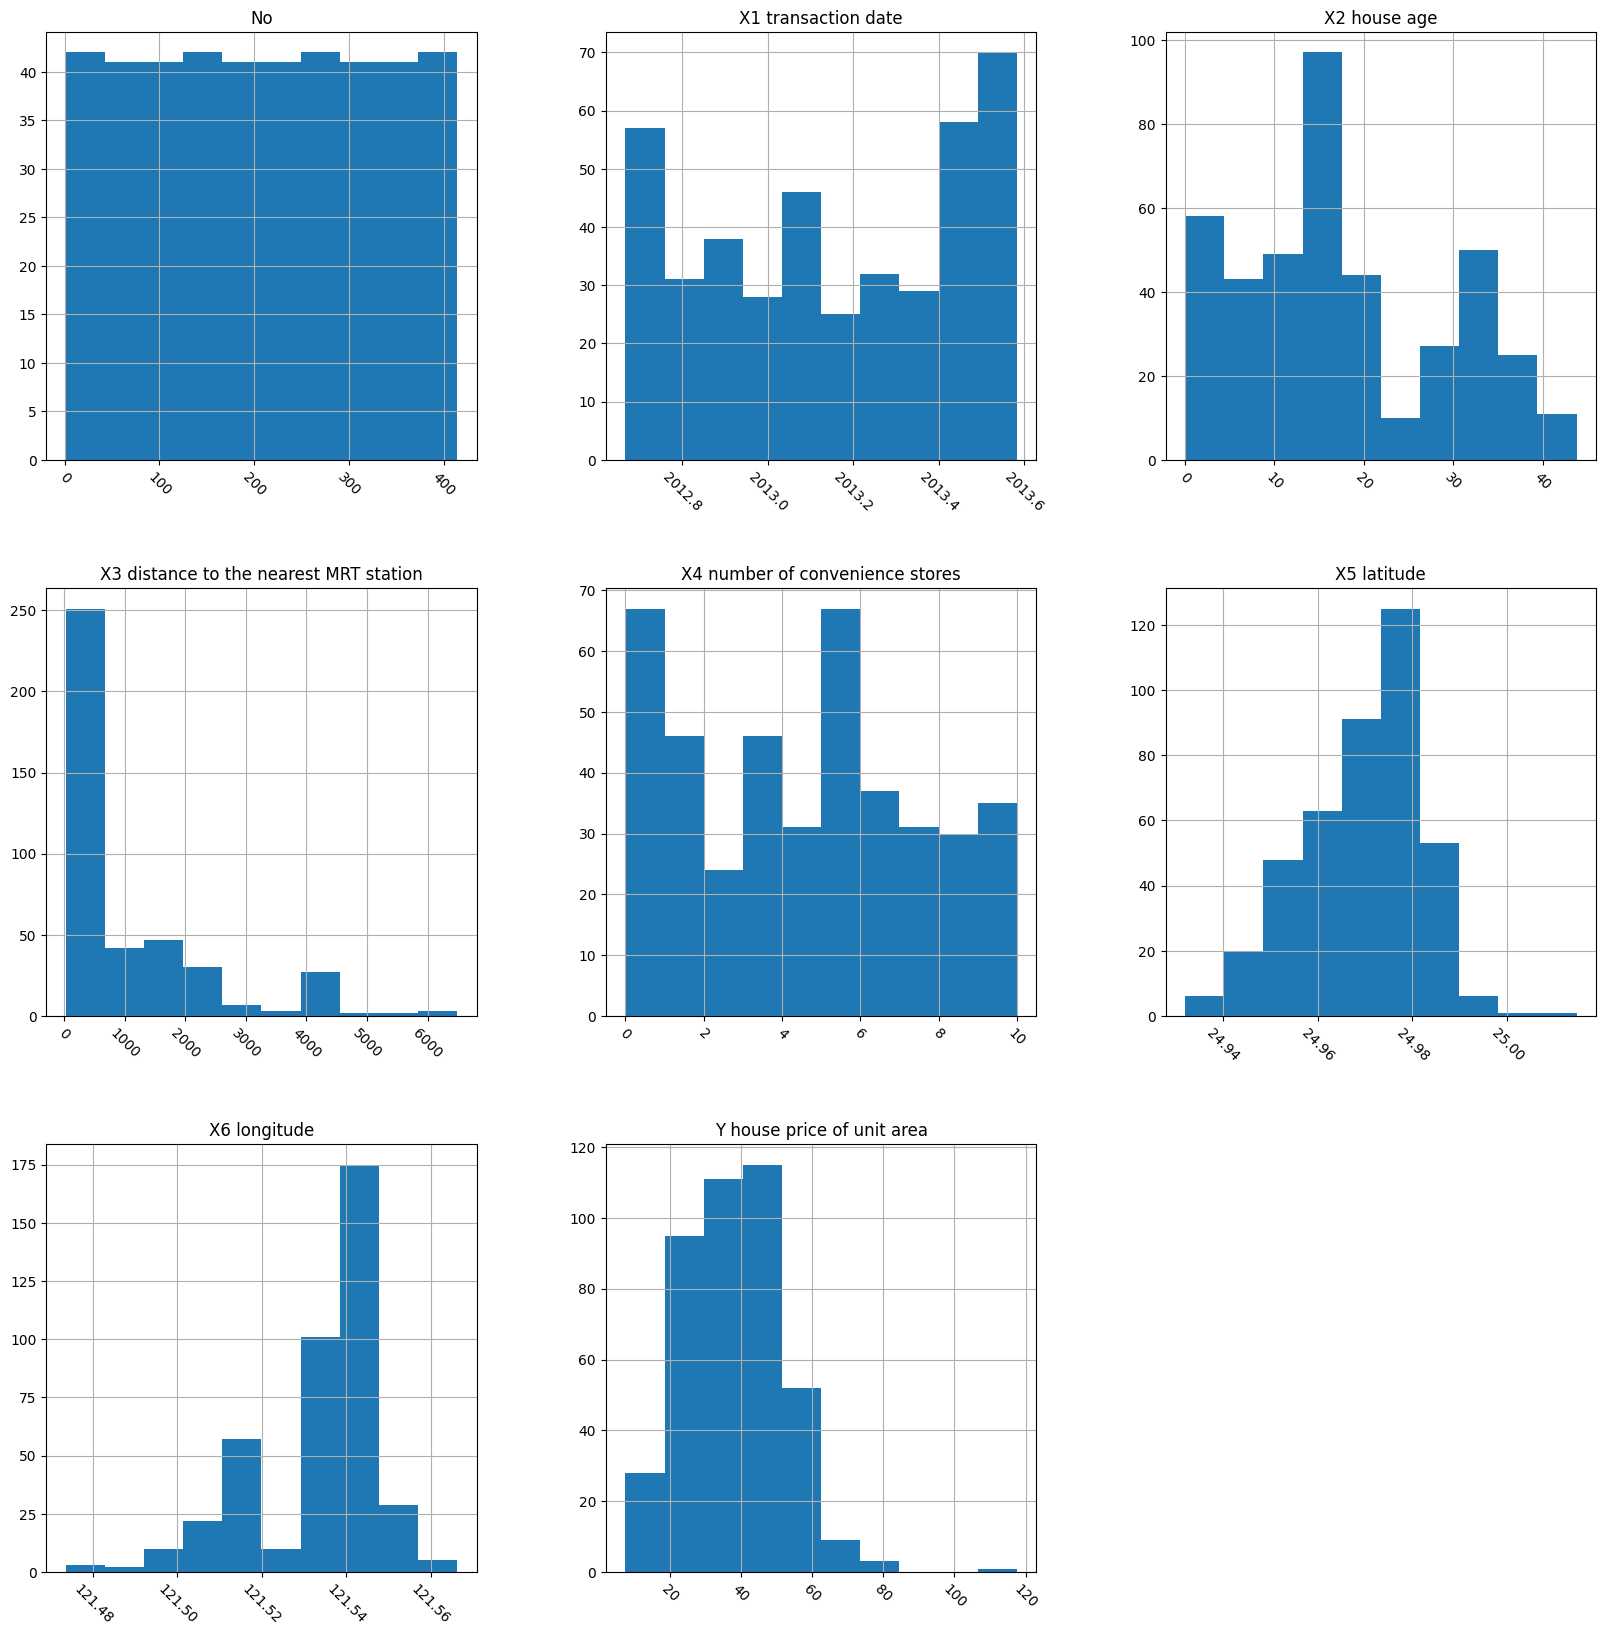

In [41]:
df.hist(figsize=(20,20), xrot=-45)

## Distribution of target variable

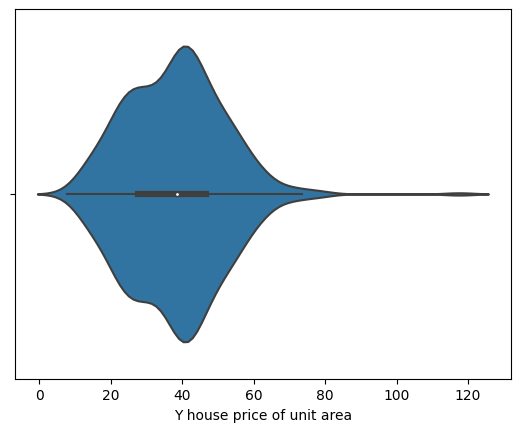

In [47]:
sns.violinplot(data=df, x='Y house price of unit area')
plt.show()